# Machine Learning

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
time: 1.73 s (started: 2024-04-23 12:16:48 +00:00)


In [ ]:
 !pip install ipython-autotime
 %load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 10.4 s (started: 2024-04-23 12:16:50 +00:00)


### Imports

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
from gensim.models import KeyedVectors
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm
from transformers import BertModel, BertTokenizer, DistilBertModel, DistilBertTokenizer, AutoTokenizer, ElectraModel
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler

import scipy
import itertools
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize


time: 2.13 ms (started: 2024-04-23 12:17:01 +00:00)


In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

time: 65.5 ms (started: 2024-04-23 12:17:01 +00:00)


### Dataset

In [ ]:
dataset_path = '../Data/dataset_1200_balanced.csv'
df = pd.read_csv(dataset_path)

time: 1.37 s (started: 2024-04-23 12:17:01 +00:00)


In [ ]:
dataset = df[~df['author_id'].isin([69, 251, 53])]

time: 2.42 ms (started: 2024-04-23 12:17:02 +00:00)


In [ ]:
dataset.head()

,author_id,text
0,168,Frank was disappointed. It is easy to think of...
1,168,While he was indulging in these uncomfortable ...
2,168,"""She will just suit me,"" said Mr. Strathmore, ..."
3,168,Mrs. Mason and Mark took a handsome flat up to...
4,168,One word more. At the close of her term of imp...


time: 332 ms (started: 2024-04-23 12:17:02 +00:00)


In [ ]:
nan_values = dataset.isnull().sum()
nan_values

author_id     0
text         13
dtype: int64

time: 13.5 ms (started: 2024-04-23 12:17:02 +00:00)


In [ ]:
 dataset = dataset.dropna()

time: 2.63 ms (started: 2024-04-23 12:17:02 +00:00)


<Axes: xlabel='author_id', ylabel='count'>

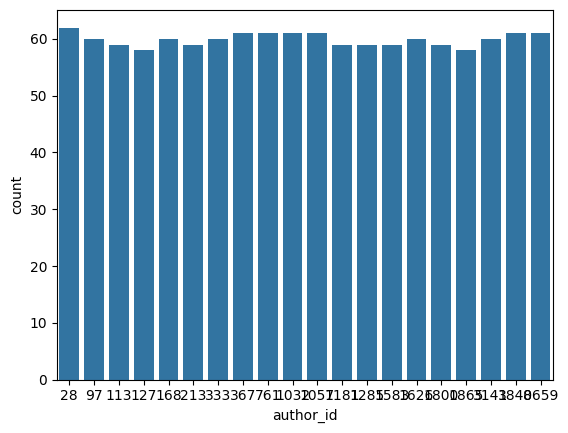

time: 561 ms (started: 2024-04-23 12:17:02 +00:00)


In [ ]:
sns.countplot(x='author_id', data=dataset)

### Preprocessing

In [ ]:
def preprocess_text(text):
    # Odstránenie non-ASCII znakov
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)
    # Odstránenie čísel
    text = re.sub(r'\d+', '', text)
    # Odstránenie interpunkcie
    text = re.sub(r'[^\w\s]', '', text)
    # Prevod na malé písmena
    text = text.lower()
    # Odstránenie stopwords
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    filtered_words = [word for word in words if word not in stop_words]
    # Lemmatizácia
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]

    return ' '.join(lemmatized_words)


time: 1.11 ms (started: 2024-04-23 12:17:03 +00:00)


In [ ]:
dataset['processed_text'] = dataset['text'].apply(preprocess_text)

time: 2min 2s (started: 2024-04-23 12:17:03 +00:00)


In [ ]:
dataset.head()

,author_id,text,processed_text
0,168,Frank was disappointed. It is easy to think of...,frank disappointed easy think earning one livi...
1,168,While he was indulging in these uncomfortable ...,indulging uncomfortable reflection suddenly li...
2,168,"""She will just suit me,"" said Mr. Strathmore, ...",suit said mr strathmore emphatically evidently...
3,168,Mrs. Mason and Mark took a handsome flat up to...,mr mason mark took handsome flat town hencefor...
4,168,One word more. At the close of her term of imp...,one word close term imprisonment peg came mr c...


time: 1.03 s (started: 2024-04-23 12:19:06 +00:00)


### Rozdelenie dát na test / train data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataset.processed_text, dataset.author_id, test_size=0.20, random_state=13, stratify=dataset.author_id)

time: 7.41 ms (started: 2024-04-23 12:19:07 +00:00)


In [ ]:
print('Train')
print(y_train.value_counts())
print('Test')
print(y_test.value_counts())

Train
author_id
28      50
1032    49
3840    49
761     49
367     49
1057    49
8659    49
97      48
168     48
1626    48
333     48
3141    48
1800    47
1583    47
1181    47
213     47
1285    47
113     47
127     46
1865    46
Name: count, dtype: int64
Test
author_id
1285    12
213     12
8659    12
1583    12
333     12
1626    12
1181    12
28      12
127     12
97      12
113     12
761     12
3840    12
1032    12
1800    12
1865    12
3141    12
367     12
168     12
1057    12
Name: count, dtype: int64
time: 7.78 ms (started: 2024-04-23 12:19:07 +00:00)


## Vektorizácia

## Bag of Words


In [ ]:
vectorizer = CountVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

time: 8.41 s (started: 2024-04-23 12:19:07 +00:00)


### Logistická regresia

In [ ]:
model = LogisticRegression(
    solver='liblinear',
    max_iter=1000,
    random_state=42
)

model.fit(X_train_vect, y_train)

y_pred = model.predict(X_test_vect)

test_accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print('Accuracy:', test_accuracy)
print('F1 score:', f1)
print('Precision:', precision)
print('Recall:', recall)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9708333333333333
F1 score: 0.9707969421882466
Precision: 0.9744505494505494
Recall: 0.9708333333333333
Confusion Matrix:
 [[12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  9  0  0  0  0  0  1  0  0  0  0  0  0  2  0  0  0  0  0]
 [ 0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 12  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 12  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 12  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 12  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 12  0 

### Naive-Bayes

In [ ]:
classifier = MultinomialNB()

classifier.fit(X_train_vect, y_train)

predicted_labels = classifier.predict(X_test_vect)

test_accuracy = accuracy_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels, average='weighted')
precision = precision_score(y_test, predicted_labels, average='weighted', zero_division=0)
recall = recall_score(y_test, predicted_labels, average='weighted')

print('Accuracy:', test_accuracy)
print('F1 score:', f1)
print('Precision:', precision)
print('Recall:', recall)
print("Confusion Matrix:\n", confusion_matrix(y_test, predicted_labels))


Accuracy: 0.9083333333333333
F1 score: 0.8883394421795543
Precision: 0.8828976286871024
Recall: 0.9083333333333333
Confusion Matrix:
 [[12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 11  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  8  0  0  0  0  3  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 10  0  0  1  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0 12  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 12  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 12  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 12  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 12  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 12  0 

## TF - IDF

In [ ]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

time: 7.98 s (started: 2024-04-23 12:19:51 +00:00)


### Logistická regresia

In [ ]:
model = LogisticRegression(
    solver='liblinear',
    max_iter=1000,
    random_state=42
)

model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

test_accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted')

print('Accuracy:', test_accuracy)
print('F1 score:', f1)
print('Precision:', precision)
print('Recall:', recall)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9666666666666667
F1 score: 0.9664192015713755
Precision: 0.9702988677988676
Recall: 0.9666666666666667
Confusion Matrix:
 [[12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  9  0  0  0  0  0  0  0  0  1  0  0  0  1  0  0  0  0  1]
 [ 0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 11  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 12  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 12  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 12  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 12  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 12  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 12  0 

### Naive-Bayes

In [ ]:
classifier = MultinomialNB()

classifier.fit(X_train_tfidf, y_train)

predicted_labels = classifier.predict(X_test_tfidf)

test_accuracy = accuracy_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels, average='weighted')
precision = precision_score(y_test, predicted_labels, average='weighted', zero_division=0)
recall = recall_score(y_test, predicted_labels, average='weighted')

print('Accuracy:', test_accuracy)
print('F1 score:', f1)
print('Precision:', precision)
print('Recall:', recall)
print("Confusion Matrix:\n", confusion_matrix(y_test, predicted_labels))


Accuracy: 0.7958333333333333
F1 score: 0.7757452906780548
Precision: 0.8302504770771024
Recall: 0.7958333333333333
Confusion Matrix:
 [[11  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  6  1  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  3  1]
 [ 0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  9  0  0  0  0  1  0  0  0  0  0  0  0  0  0  2]
 [ 0  0  0  0  0 10  0  0  0  0  0  1  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  3]
 [ 0  0  0  0  0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  3  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 12  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  5  0  4]
 [ 0  0  0  0  0  0  0  0  0  0  0 12  0  0  0  0  0  0  0  0]
 [ 0  0  0  3  0  0  0  0  0  0  0  0  6  0  0  0  0  0  2  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 12  0 

## GloVe


In [ ]:
from gensim.scripts.glove2word2vec import glove2word2vec

glove_input_file = '/content/drive/MyDrive/glove.6B.300d.txt'
word2vec_output_file = 'glove.6B.300d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)


<ipython-input-37-5c75194aba4b>:5: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_input_file, word2vec_output_file)


(400000, 300)

time: 3min 7s (started: 2024-04-23 12:20:11 +00:00)


In [ ]:
import numpy as np
from gensim.models import KeyedVectors

glove_model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)

def document_vector(doc):
    words = doc.split()
    valid_words = [word for word in words if word in glove_model.key_to_index]
    if not valid_words:
        return np.zeros(glove_model.vector_size)
    doc_embedding = np.mean(glove_model[valid_words], axis=0)
    return doc_embedding

processed_texts = dataset['processed_text'].tolist()

embedding_matrix = np.array([document_vector(doc) for doc in processed_texts])


time: 2min 9s (started: 2024-04-23 12:23:18 +00:00)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

labels = dataset['author_id'].tolist()

X_train, X_test, y_train, y_test = train_test_split(embedding_matrix, labels, test_size=0.2, random_state=42)


time: 7.28 ms (started: 2024-04-23 12:25:28 +00:00)


In [ ]:
print(X_train)
print(y_train)

[[-0.04994836  0.01714301 -0.05492731 ... -0.1236221  -0.05499655
   0.057917  ]
 [-0.05643255 -0.0106019  -0.00553358 ... -0.06847008 -0.07445921
   0.00558024]
 [-0.04155297  0.03028173 -0.09801958 ... -0.06509756  0.03070559
   0.13758999]
 ...
 [-0.09102127  0.03512798 -0.06073952 ... -0.06447641 -0.08477479
   0.1229317 ]
 [-0.08961115 -0.02106281 -0.02236726 ... -0.09396835 -0.0767794
   0.15579468]
 [-0.08993502  0.03169715 -0.02880298 ... -0.0634861  -0.06965668
   0.06726862]]
[8659, 1583, 1865, 1181, 1057, 28, 333, 3840, 1865, 1057, 333, 1583, 1583, 1057, 3840, 97, 1800, 1285, 1032, 113, 1285, 8659, 761, 367, 333, 3840, 28, 28, 3840, 127, 28, 213, 367, 3141, 1032, 168, 168, 1032, 127, 1057, 213, 1181, 168, 97, 367, 3141, 367, 3840, 97, 1626, 127, 3141, 127, 113, 1865, 761, 1285, 113, 113, 113, 761, 213, 1800, 113, 333, 113, 3840, 1865, 1865, 97, 1800, 168, 1285, 113, 8659, 1583, 761, 3141, 333, 113, 761, 213, 1285, 367, 1626, 28, 761, 1032, 213, 1800, 1583, 168, 168, 8659, 31

### Logistická regresia

In [ ]:
model = LogisticRegression(
    solver='liblinear',
    max_iter=1000,
    random_state=42
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print('Accuracy:', test_accuracy)
print('F1 score:', f1)
print('Precision:', precision)
print('Recall:', recall)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8208333333333333
F1 score: 0.8231220944505224
Precision: 0.8421839098401598
Recall: 0.8208333333333333
Confusion Matrix:
 [[ 5  1  0  0  0  1  0  0  0  0  0  0  0  0  0  1  0  1  0  0]
 [ 3  6  1  0  1  0  0  0  0  0  0  0  0  0  1  0  0  0  1  0]
 [ 1  1  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  4  0  0  6  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  1  0  0  0  0  0 13  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  8  0  0  0  0  1  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  2]
 [ 2  0  0  0  0  0  0  0  1  1  9  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0 10  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 12  0 

### Naive-Bayes

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

time: 8.58 ms (started: 2024-04-23 12:25:29 +00:00)


In [ ]:
classifier = MultinomialNB()

classifier.fit(X_train_scaled, y_train)

predicted_labels = classifier.predict(X_test_scaled)

test_accuracy = accuracy_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels, average='weighted')
precision = precision_score(y_test, predicted_labels, average='weighted', zero_division=0)
recall = recall_score(y_test, predicted_labels, average='weighted')

print('Accuracy:', test_accuracy)
print('F1 score:', f1)
print('Precision:', precision)
print('Recall:', recall)
print("Confusion Matrix:\n", confusion_matrix(y_test, predicted_labels))

Accuracy: 0.7833333333333333
F1 score: 0.7876848655380236
Precision: 0.8050272181522182
Recall: 0.7833333333333333
Confusion Matrix:
 [[ 5  2  0  0  0  1  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 2  7  1  0  0  0  0  0  0  0  0  0  0  0  1  0  0  1  1  0]
 [ 1  1  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  3  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  1  0  0  1  0  0 10  0  0  0  0  0  0  1  0  1  0  0  0]
 [ 1  0  0  0  0  0  0  0  8  0  0  0  0  1  0  1  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0 12  0  0  0  0  0  0  0  0  0  3]
 [ 1  0  0  0  0  0  0  0  1  1  9  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 16  1  0  0  0  0  0  0  0]
 [ 1  1  0  0  0  0  0  0  0  0  0  0  9  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 12  0 

## Word2Vec

In [ ]:
model_path = '/content/drive/MyDrive/GoogleNews-vectors-negative300.bin'
w2v_model = KeyedVectors.load_word2vec_format(model_path, binary=True)

time: 1min 13s (started: 2024-04-23 12:25:29 +00:00)


In [ ]:
def document_vector(model, doc):
    words = doc.split()
    valid_words = [word for word in words if word in model.key_to_index]
    if not valid_words:
        return np.zeros(model.vector_size)
    return np.mean(model[valid_words], axis=0)


time: 1.04 ms (started: 2024-04-23 12:26:42 +00:00)


In [ ]:
document_vectors = np.array([document_vector(w2v_model, doc) for doc in dataset['processed_text']])

time: 27.2 s (started: 2024-04-23 12:26:42 +00:00)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(document_vectors, dataset['author_id'], test_size=0.2, random_state=42)

time: 4.43 ms (started: 2024-04-23 12:27:09 +00:00)


### Logistická regresia

In [ ]:
model = LogisticRegression(
    solver='liblinear',
    max_iter=1000,
    random_state=42
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted')

print('Accuracy:', test_accuracy)
print('F1 score:', f1)
print('Precision:', precision)
print('Recall:', recall)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6708333333333333
F1 score: 0.6705625427645354
Precision: 0.8175696574773401
Recall: 0.6708333333333333
Confusion Matrix:
 [[ 8  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  1  6  0  0  0  0  1  0  0  0  1  0  0  1  0  0  0  0  0]
 [ 1  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0 10  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 3  0  6  1  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  9  0  0  0  0  0  0  1  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 13  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  0  6  0  0  0  0  2  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  8  0  0  0  2  4  0  0  0  0  1]
 [ 2  0  0  0  0  0  0  0  2  1  8  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0]
 [ 2  0  1  2  0  0  0  0  0  0  0  0  6  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 12  0 

### Naive-Bayes

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

time: 8.43 ms (started: 2024-04-23 12:27:10 +00:00)


In [ ]:
X_train_scaled

array([[0.5375313 , 0.6313263 , 0.32350782, ..., 0.479451  , 0.8276633 ,
        0.16889146],
       [0.6113185 , 0.45562115, 0.70785284, ..., 0.35820854, 0.5370697 ,
        0.5543779 ],
       [0.4824664 , 0.37761417, 0.5601375 , ..., 0.41033244, 0.        ,
        0.52710164],
       ...,
       [0.42362005, 0.48740545, 0.40356296, ..., 0.3039167 , 0.5855495 ,
        0.2421912 ],
       [0.2677073 , 0.35069308, 0.35421944, ..., 0.22097987, 0.6303381 ,
        0.3418095 ],
       [0.5019587 , 0.6932467 , 0.39454228, ..., 0.3657635 , 0.55671084,
        0.3280945 ]], dtype=float32)

time: 7.41 ms (started: 2024-04-23 12:27:10 +00:00)


In [ ]:
classifier = MultinomialNB()

classifier.fit(X_train_scaled, y_train)

predicted_labels = classifier.predict(X_test_scaled)

test_accuracy = accuracy_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels, average='weighted')
precision = precision_score(y_test, predicted_labels, average='weighted', zero_division=0)
recall = recall_score(y_test, predicted_labels, average='weighted')

print('Accuracy:', test_accuracy)
print('F1 score:', f1)
print('Precision:', precision)
print('Recall:', recall)
print("Confusion Matrix:\n", confusion_matrix(y_test, predicted_labels))

Accuracy: 0.7916666666666666
F1 score: 0.792231545616728
Precision: 0.8034475246975247
Recall: 0.7916666666666666
Confusion Matrix:
 [[ 5  1  0  0  0  1  0  0  0  0  0  0  0  0  0  1  0  1  0  0]
 [ 2  6  2  0  0  2  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 1  1  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  1  1  0  8  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0 10  0  0  1  0  1  0  1  0  1  0  0  0]
 [ 0  0  0  1  0  0  0  0  9  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0 12  0  0  0  0  0  0  0  0  0  3]
 [ 1  0  0  0  0  1  0  0  1  1  9  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 16  1  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0 10  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 12  0  

## Bert

In [ ]:
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

def bert_encode(document, tokenizer, model):
    inputs = tokenizer(document, return_tensors="pt", padding=True, truncation=True)
    outputs = model(**inputs)
    embeddings = outputs.last_hidden_state[:, 0, :].detach().numpy()
    return embeddings



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

time: 6.32 s (started: 2024-04-23 12:27:10 +00:00)


In [ ]:
documents = dataset['processed_text']
labels = dataset['author_id']

embeddings = np.vstack([bert_encode(doc, tokenizer, model) for doc in documents])

time: 45min 56s (started: 2024-04-23 12:27:16 +00:00)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(embeddings, labels, test_size=0.2)

time: 6.71 ms (started: 2024-04-23 13:13:13 +00:00)


### Logistická regresia

In [ ]:
model = LogisticRegression(
    solver='liblinear',
    max_iter=1000,
    random_state=42
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted')

print('Accuracy:', test_accuracy)
print('F1 score:', f1)
print('Precision:', precision)
print('Recall:', recall)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8083333333333333
F1 score: 0.8109046948526871
Precision: 0.8318003673886026
Recall: 0.8083333333333333
Confusion Matrix:
 [[ 9  0  0  0  0  1  1  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  4  0  0  0  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  7  1  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0]
 [ 0  0  1 13  1  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  1  1  0  9  0  0  0  0  0  1  0  0  0  0  2  0  0]
 [ 0  0  0  0  0  0  0 15  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0 12  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  1  0  1]
 [ 0  0  0  0  0  1  0  0  1  0 11  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 16  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  1  0  0  1  1  0  0 12  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  9  0 

### Naive-Bayes

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

time: 17.7 ms (started: 2024-04-23 13:13:16 +00:00)


In [ ]:
classifier = MultinomialNB()

classifier.fit(X_train_scaled, y_train)

predicted_labels = classifier.predict(X_test_scaled)

test_accuracy = accuracy_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels, average='weighted')
precision = precision_score(y_test, predicted_labels, average='weighted', zero_division=0)
recall = recall_score(y_test, predicted_labels, average='weighted')

print('Accuracy:', test_accuracy)
print('F1 score:', f1)
print('Precision:', precision)
print('Recall:', recall)
print("Confusion Matrix:\n", confusion_matrix(y_test, predicted_labels))

Accuracy: 0.7
F1 score: 0.7020315101694836
Precision: 0.7264426294021882
Recall: 0.7
Confusion Matrix:
 [[ 7  0  1  0  0  0  1  0  1  0  0  0  1  0  0  0  0  0  1  0]
 [ 0  4  0  0  0  0  0  1  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0]
 [ 0  0  3 11  0  0  0  0  2  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  8  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  8  0  0  2  0  0  0  0  1  0  0  0  2  1]
 [ 0  0  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 1  0  1  1  0  0  0  0  9  1  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  2  0  0  4  1  0  0  1  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  1  0  1  0 11  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 16  0  0  0  0  0  0  0  0]
 [ 1  1  0  0  1  1  0  0  3  1  0  0  7  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  9  0  0  0  0  0  1]
 [ 0  0  0  0 

## DistilBert

In [ ]:
model_name = 'distilbert-base-uncased'
tokenizer = DistilBertTokenizer.from_pretrained(model_name)
model = DistilBertModel.from_pretrained(model_name)

def bert_encode(document, tokenizer, model):
    inputs = tokenizer(document, max_length=512, return_tensors="pt", padding=True, truncation=True)
    outputs = model(**inputs)
    embeddings = outputs.last_hidden_state[:, 0, :].detach().numpy()
    return embeddings



time: 1.38 s (started: 2024-04-23 13:19:37 +00:00)


In [ ]:
documents = dataset['processed_text']
labels = dataset['author_id']

embeddings = np.vstack([bert_encode(doc, tokenizer, model) for doc in documents])

time: 24min 56s (started: 2024-04-23 13:19:41 +00:00)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(embeddings, labels, test_size=0.2)

time: 28.9 ms (started: 2024-04-23 13:44:37 +00:00)


### Logistická regresia

In [ ]:
model = LogisticRegression(
    solver='liblinear',
    max_iter=1000,
    random_state=42
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted')

print('Accuracy:', test_accuracy)
print('F1 score:', f1)
print('Precision:', precision)
print('Recall:', recall)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7625
F1 score: 0.7616995011471097
Precision: 0.7751834521687461
Recall: 0.7625
Confusion Matrix:
 [[10  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  4  1  0  1  1  0  1  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 1  1  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0 13  1  0  0  0  1  0  0  0  0  0  0  0  0  0  1  0]
 [ 1  2  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  2  0  0  1 10  1  0  1  0  0  0  0  0  0  0  1  0  0  1]
 [ 0  0  0  0  0  0 10  1  0  1  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0 16  0  0  0  0  0  0  2  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  6  0  0  0  1  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  9  1  0  0  0  0  0  0  0  1  2]
 [ 0  0  0  0  0  0  0  0  1  0 11  0  0  0  0  0  0  2  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 12  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  6  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 10  0  0  0  0  0  0]
 [ 0  0 

### Naive-Bayes

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

time: 8.8 ms (started: 2024-04-23 13:44:40 +00:00)


In [ ]:
classifier = MultinomialNB()

classifier.fit(X_train_scaled, y_train)

predicted_labels = classifier.predict(X_test_scaled)

test_accuracy = accuracy_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels, average='weighted')
precision = precision_score(y_test, predicted_labels, average='weighted', zero_division=0)
recall = recall_score(y_test, predicted_labels, average='weighted')

print('Accuracy:', test_accuracy)
print('F1 score:', f1)
print('Precision:', precision)
print('Recall:', recall)
print("Confusion Matrix:\n", confusion_matrix(y_test, predicted_labels))

Accuracy: 0.5958333333333333
F1 score: 0.5958213617809206
Precision: 0.6494592662239722
Recall: 0.5958333333333333
Confusion Matrix:
 [[ 4  0  0  3  0  0  0  0  2  0  0  0  0  1  0  1  0  0  0  0]
 [ 1  4  1  0  0  0  1  1  0  0  0  0  0  0  1  1  0  0  0  0]
 [ 1  0  3  0  0  0  0  0  0  0  0  0  0  1  0  0  0  1  0  0]
 [ 1  0  2 10  0  0  1  0  0  0  0  1  1  0  0  0  0  0  0  1]
 [ 2  2  0  0  7  0  1  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 1  2  1  0  1  7  3  0  1  0  0  0  1  0  0  0  0  0  1  0]
 [ 0  0  1  0  0  0  4  0  0  0  0  0  0  0  0  0  1  0  2  5]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  1  0  3  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  5  0  0  0  1  1  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  6  1  0  0  1  0  0  0  0  0  5]
 [ 0  0  0  0  1  0  0  0  0  0 10  0  0  0  0  1  0  2  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 12  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  1  5  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 10  0 

time: 67.2 ms (started: 2024-04-23 13:44:40 +00:00)


## Electra

In [ ]:
model_name = 'google/electra-small-discriminator'
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = ElectraModel.from_pretrained(model_name)

def electra_encode(document, tokenizer, model):
    inputs = tokenizer(document, return_tensors="pt", padding=True, truncation=True)
    outputs = model(**inputs)
    embeddings = outputs.last_hidden_state[:, 0, :].detach().numpy()
    return embeddings



tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/54.2M [00:00<?, ?B/s]

time: 2.64 s (started: 2024-04-23 13:44:40 +00:00)


In [ ]:
documents = dataset['processed_text']
labels = dataset['author_id']

embeddings = np.vstack([electra_encode(doc, tokenizer, model) for doc in documents])

time: 7min 51s (started: 2024-04-23 13:44:42 +00:00)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(embeddings, labels, test_size=0.2)

time: 3.22 ms (started: 2024-04-23 13:52:34 +00:00)


### Logistická regresia

In [ ]:
model = LogisticRegression(
    solver='liblinear',
    max_iter=1000,
    random_state=42
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted')

print('Accuracy:', test_accuracy)
print('F1 score:', f1)
print('Precision:', precision)
print('Recall:', recall)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6416666666666667
F1 score: 0.6466846700878242
Precision: 0.6720618658302483
Recall: 0.6416666666666667
Confusion Matrix:
 [[ 9  1  0  0  1  0  0  0  0  0  0  0  0  0  0  1  0  1  1  0]
 [ 0  5  0  3  0  1  1  1  0  1  1  0  0  1  0  0  0  2  0  0]
 [ 0  0  7  0  0  0  0  0  1  0  0  0  0  0  0  0  0  3  0  0]
 [ 0  0  0  4  0  0  0  0  1  0  1  0  1  0  0  0  0  1  1  1]
 [ 0  0  1  0 11  0  0  0  0  0  1  0  0  0  1  0  0  0  1  0]
 [ 0  0  1  0  0  5  0  0  1  0  3  0  0  0  1  1  0  1  0  0]
 [ 0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  1  0  1  2]
 [ 0  0  0  0  1  0  0 12  0  0  0  0  2  0  1  0  0  0  1  0]
 [ 0  1  1  1  0  0  0  0  6  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  1  0  0  0  0  1  0  0  7  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  7  0  0  0  0  1  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  1  0  0  2  0  0  0  6  0  0  0  1  1  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  1  1  0 11  0 

### Naive-Bayes

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

time: 4.11 ms (started: 2024-04-23 13:52:35 +00:00)


In [ ]:
classifier = MultinomialNB()

classifier.fit(X_train_scaled, y_train)

predicted_labels = classifier.predict(X_test_scaled)

test_accuracy = accuracy_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels, average='weighted')
precision = precision_score(y_test, predicted_labels, average='weighted', zero_division=0)
recall = recall_score(y_test, predicted_labels, average='weighted')

print('Accuracy:', test_accuracy)
print('F1 score:', f1)
print('Precision:', precision)
print('Recall:', recall)
print("Confusion Matrix:\n", confusion_matrix(y_test, predicted_labels))

Accuracy: 0.4375
F1 score: 0.42529559332179667
Precision: 0.44938307641432645
Recall: 0.4375
Confusion Matrix:
 [[ 8  0  0  0  1  0  0  0  1  0  0  0  0  0  1  1  0  2  0  0]
 [ 0  0  0  2  1  2  2  1  0  2  0  0  0  3  0  0  0  1  0  2]
 [ 1  0  5  0  2  0  0  0  0  0  1  0  0  0  0  0  0  1  1  0]
 [ 0  0  3  3  1  0  0  0  0  0  1  0  0  0  0  0  0  1  0  1]
 [ 0  1  0  0  8  0  0  0  0  0  1  0  0  0  1  0  0  0  1  3]
 [ 0  0  2  0  0  1  0  0  1  0  3  0  0  2  0  1  0  2  0  1]
 [ 0  0  1  0  1  0  1  0  0  0  0  0  2  0  0  0  0  0  2  2]
 [ 0  0  0  2  1  0  0 12  0  0  0  0  0  0  0  0  0  0  2  0]
 [ 0  1  0  2  1  0  1  0  3  0  1  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  1  0  0  1  0  1  0  6  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0]
 [ 0  0  2  2  1  1  0  0  1  0  0  0  4  0  0  0  1  0  0  0]
 [ 0  0  0  0  1  0  1  0  1  1  0  0  0  9  0  0  0  1  0  0]
 [ 0  

time: 49.3 ms (started: 2024-04-23 13:52:35 +00:00)
